In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/merged_dfs.csv')

df = df.rename(columns=
          {'10394':'target1',
          '10395':'target2'})

# 8741 es el codigo de la peninsula
df = df[df.geo_id==8741]

Input all NaNs as 0s

In [45]:
df = df.fillna(0)

In [46]:
df['datetime'] = pd.to_datetime(df['datetime'],utc=True)

In [47]:
df = df[df['datetime'].dt.minute % 15 == 0]

In [48]:
df.set_index('datetime',inplace=True)

In [54]:
df = df.drop(columns=['geo_id','geo_name'])

In [55]:
df.to_csv('../data/by_quarter_nan_0_terciaria.csv')

In [42]:
df = pd.read_csv('../data/by_quarter_nan_0_terciaria.csv',)

Doing predictions

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# google has deprecated tensorflow though

In [61]:
import numpy as np

In [58]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df)

In [59]:
df.loc[:] = scaled_features

In [63]:
def create_sequences(df, sequence_length):
    X, y = [], []
    for i in range(len(df) - sequence_length):
        X.append(df.iloc[i:i+sequence_length])
        y.append(df.iloc[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 24
X, y = create_sequences(df, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [68]:
y[0]

array([0.00000000e+00, 6.00000000e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.28506676e-01, 1.61479742e-01,
       0.00000000e+00, 8.38457362e-01, 0.00000000e+00, 1.59850644e-02,
       6.39011694e-01, 0.00000000e+00, 9.16506465e-01, 0.00000000e+00,
       8.01143425e-01, 2.66730372e-01, 5.25625945e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.22592279e-01, 5.14254536e-01,
       5.14277919e-01, 4.74575311e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.61479742e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.15391879e-02, 2.28506676e-01,
       1.61479742e-01, 3.72078957e-01, 4.51878306e-01, 4.57638016e-01,
       5.31250830e-05, 3.98565443e-01, 3.39366967e-01, 0.00000000e+00,
       1.45843461e-02, 4.74575311e-01, 1.68075999e-02, 6.40869832e-01,
       6.87396026e-04, 9.16946511e-01, 1.61479742e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.89034508e-04, 9.16946511e-01,
      

In [69]:
# Define the model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, X.shape[2])),
    Dense(y[0].shape[0])
])

model.compile(optimizer='adam', loss='mse')

# Summary of the model
model.summary()

/home/aner/.venvs/energy/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        21,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 58)             │         2,958 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,758 (96.71 KB)

 Trainable params: 24,758 (96.71 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.fit(X, y, epochs=50, batch_size=32)

Epoch 1/50
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0166
Epoch 2/50
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0022
Epoch 3/50
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0019
Epoch 4/50
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0017
Epoch 5/50
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0015
Epoch 6/50
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0013
Epoch 7/50
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0013
Epoch 8/50
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0012
Epoch 9/50
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0012
Epoch 10/50
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0012
Epoch 11/50
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0012
Epoch 12/50
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0012
Epoch 13/50
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0011
Epoch 14/50
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0011
Epoch 15/50
1854/1

In [76]:
model.save('../data/models/model_no_delay_terciaria.keras')

In [73]:
y_pred = model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [74]:
y_test

array([[0.00000000e+00, 0.00000000e+00, 7.28000000e-02, ...,
        9.36002120e-01, 3.10620754e-04, 9.34675631e-01],
       [0.00000000e+00, 0.00000000e+00, 7.28000000e-02, ...,
        9.36002120e-01, 3.10620754e-04, 9.34675631e-01],
       [0.00000000e+00, 0.00000000e+00, 5.68000000e-02, ...,
        9.40792854e-01, 3.10620754e-04, 9.34675631e-01],
       ...,
       [1.02000000e-01, 0.00000000e+00, 4.00000000e-02, ...,
        9.36002120e-01, 3.10620754e-04, 9.34675631e-01],
       [1.02000000e-01, 0.00000000e+00, 4.00000000e-02, ...,
        9.36002120e-01, 3.10620754e-04, 9.34675631e-01],
       [1.02000000e-01, 0.00000000e+00, 4.00000000e-02, ...,
        9.38971533e-01, 3.10620754e-04, 9.34675631e-01]])

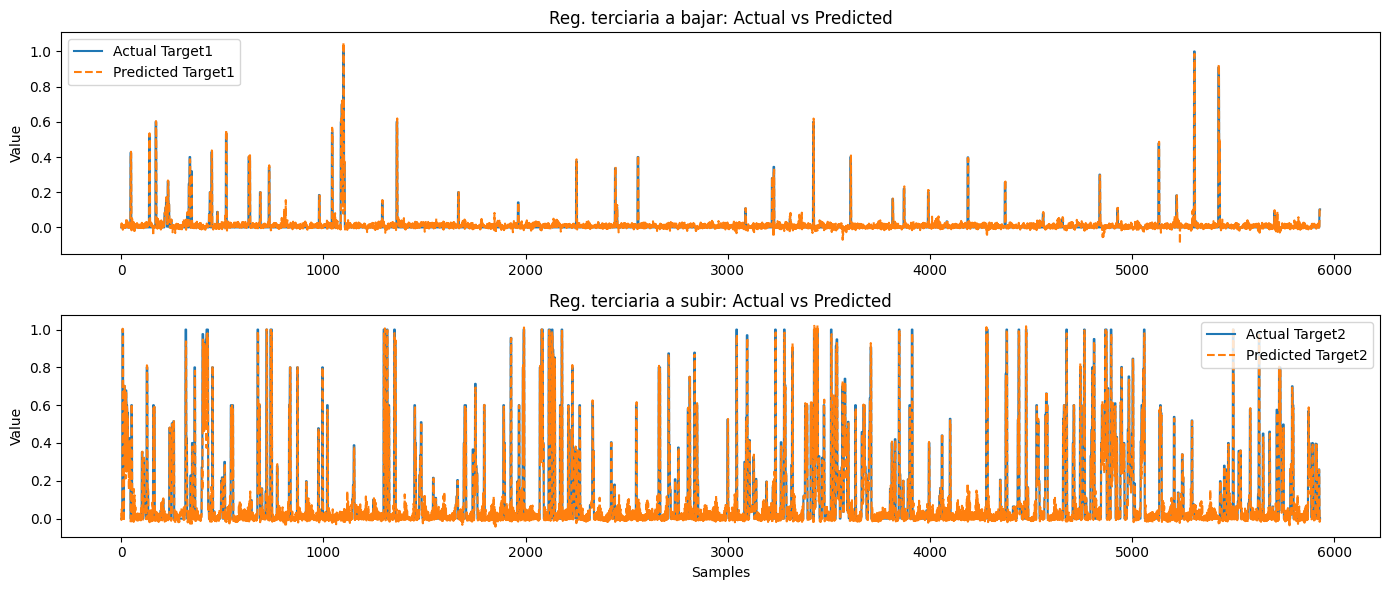

In [77]:
y_test_target1 = y_test[:, 0]
y_test_target2 = y_test[:, 1]
y_pred_target1 = y_pred[:, 0]
y_pred_target2 = y_pred[:, 1]

# Plot predictions vs actual values for target1
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(y_test_target1, label='Actual Target1')
plt.plot(y_pred_target1, label='Predicted Target1', linestyle='dashed')
plt.title('Reg. terciaria a bajar: Actual vs Predicted')
plt.ylabel('Value')
plt.legend()

# Plot predictions vs actual values for target2
plt.subplot(2, 1, 2)
plt.plot(y_test_target2, label='Actual Target2')
plt.plot(y_pred_target2, label='Predicted Target2', linestyle='dashed')
plt.title('Reg. terciaria a subir: Actual vs Predicted')
plt.ylabel('Value')
plt.legend()

plt.xlabel('Samples')
plt.tight_layout()
plt.show()